### Import 

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import ast
from wordcloud import WordCloud

In [36]:
def import_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    return train, test
    
def extract_from_str(df, column):
    df[column] = df[column].apply(lambda x: 0 if pd.isna(x) else ast.literal_eval(x))

def corr_rev(df):
    print(df.corr()['revenue'])

In [3]:
train, test = import_data()

### Belong_to_collection

In [137]:
extract_from_str(train, 'belongs_to_collection')

In [134]:
train['belongs_to_collection'].head(10)

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                    0
3                                                    0
4                                                    0
5                                                    0
6                                                    0
7                                                    0
8    [{'id': 256377, 'name': 'The Muppet Collection...
9                                                    0
Name: belongs_to_collection, dtype: object

In [135]:
def if_belongs_with_id(df):  
    df['if_collection'] = df['belongs_to_collection'].map(lambda x: 0 if x == 0 else 1)
    df['id_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == 0 else x[0]['id'])



In [138]:
if_belongs_with_id(train)

In [139]:
train[['belongs_to_collection', 'if_collection', 'id_collection']].head(10)

,belongs_to_collection,if_collection,id_collection
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",1,313576
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",1,107674
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,"[{'id': 256377, 'name': 'The Muppet Collection...",1,256377
9,0,0,0


In [140]:
def count_collection(df):
    max = train['id_collection'].value_counts().max()
    count_df = df['id_collection'].value_counts(sort=False).apply(lambda x: 0 if x == max else x)
    count_dic = count_df.to_dict()
    df['quantity_collection'] = df['id_collection'].map(count_dic)
    df.drop(['belongs_to_collection','id_collection'], axis=1, inplace = True)

In [126]:
count_collection(train)

<AxesSubplot:xlabel='quantity_collection', ylabel='count'>

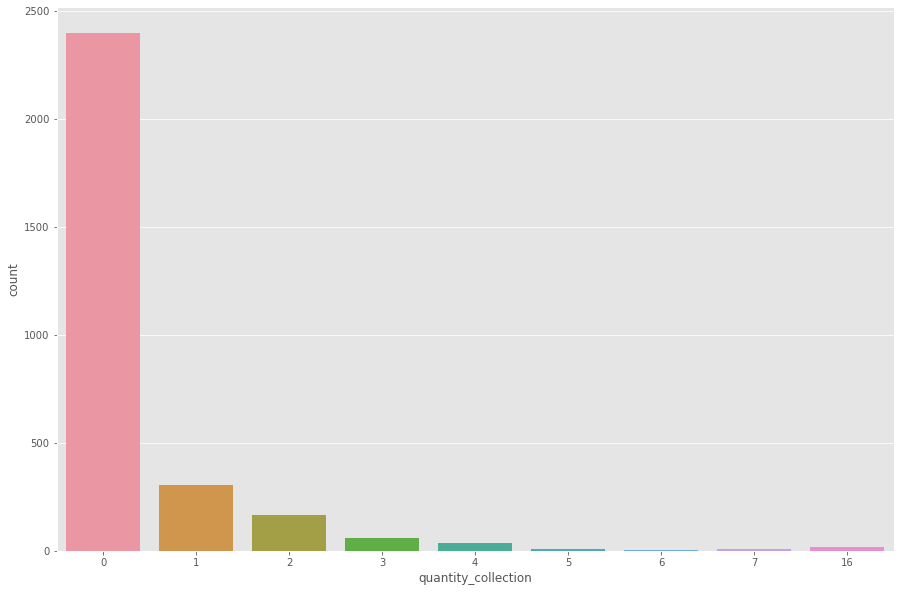

In [127]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'quantity_collection', data = train)

In [128]:
train[['if_collection','quantity_collection']].head(10)

,if_collection,quantity_collection
0,1,1
1,1,2
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,2
9,0,0


In [129]:
train.corr()['revenue']

id                     0.000610
budget                 0.752965
popularity             0.461460
runtime                0.216380
revenue                1.000000
if_collection          0.339425
quantity_collection    0.291476
Name: revenue, dtype: float64

In [ ]:
#collection -> sprawdzić razem z latami 

### Original language

<AxesSubplot:xlabel='original_language', ylabel='count'>

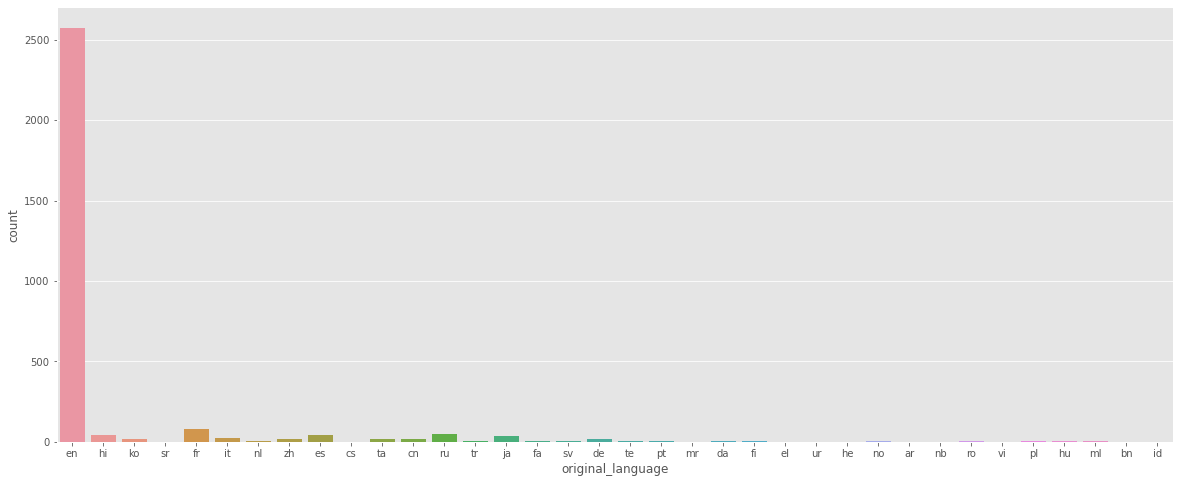

In [82]:
plt.figure(figsize=(20, 8))
sns.countplot(x = 'original_language', data = train)

In [49]:
def if_lang_eng(df):
    df['language_eng'] = df['original_language'].map(lambda x: 1 if x == 'en' else 0)


In [52]:
if_lang_eng(train)

In [53]:
train[['language_eng','original_language']].head(10)

,language_eng,original_language
0,1,en
1,1,en
2,1,en
3,0,hi
4,0,ko
5,1,en
6,1,en
7,1,en
8,1,en
9,1,en


<AxesSubplot:xlabel='language_eng', ylabel='count'>

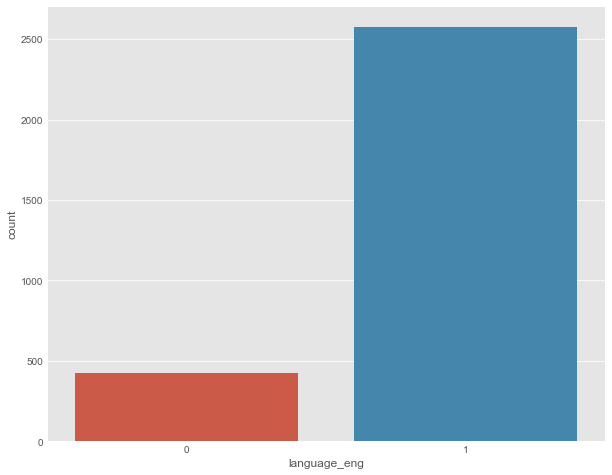

In [55]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'language_eng', data = train)

### Original title

In [96]:
train, test = import_data()

In [97]:
train['original_title'].head(10) 

0                      Hot Tub Time Machine 2
1    The Princess Diaries 2: Royal Engagement
2                                    Whiplash
3                                     Kahaani
4                                        마린보이
5      Pinocchio and the Emperor of the Night
6                              The Possession
7                                Control Room
8                      Muppet Treasure Island
9                               A Mighty Wind
Name: original_title, dtype: object

In [100]:
def diff_title(df):
    for i in range(len(df)):
        if df['title'][i] == df['original_title'][i]:
            df['diff_title'][i] = 1

        else:
            df['diff_title'][i] = 0

In [102]:
train['diff_title'] = 0

In [104]:
diff_title(train)

<ipython-input-100-005736c6bd2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_title'][i] = 1
<ipython-input-100-005736c6bd2a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_title'][i] = 0


In [107]:
train['diff_title'].value_counts()

1    2649
0     351
Name: diff_title, dtype: int64

In [108]:
train[['title', 'original_title', 'diff_title', 'original_language']].head(50)

,title,original_title,diff_title,original_language
0,Hot Tub Time Machine 2,Hot Tub Time Machine 2,1,en
1,The Princess Diaries 2: Royal Engagement,The Princess Diaries 2: Royal Engagement,1,en
2,Whiplash,Whiplash,1,en
3,Kahaani,Kahaani,1,hi
4,Marine Boy,마린보이,0,ko
5,Pinocchio and the Emperor of the Night,Pinocchio and the Emperor of the Night,1,en
6,The Possession,The Possession,1,en
7,Control Room,Control Room,1,en
8,Muppet Treasure Island,Muppet Treasure Island,1,en
9,A Mighty Wind,A Mighty Wind,1,en


### Genres

In [155]:
train, test = import_data()
extract_from_str(train, 'genres')

In [159]:
train['list_genres'] = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
train[['genres', 'list_genres']].head(10)

,genres,list_genres
0,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Family, Romance]"
2,"[{'id': 18, 'name': 'Drama'}]",[Drama]
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[Thriller, Drama]"
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","[Action, Thriller]"
5,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...","[Animation, Adventure, Family]"
6,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[Horror, Thriller]"
7,"[{'id': 99, 'name': 'Documentary'}]",[Documentary]
8,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[Action, Comedy, Music, Family, Adventure]"
9,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...","[Comedy, Music]"


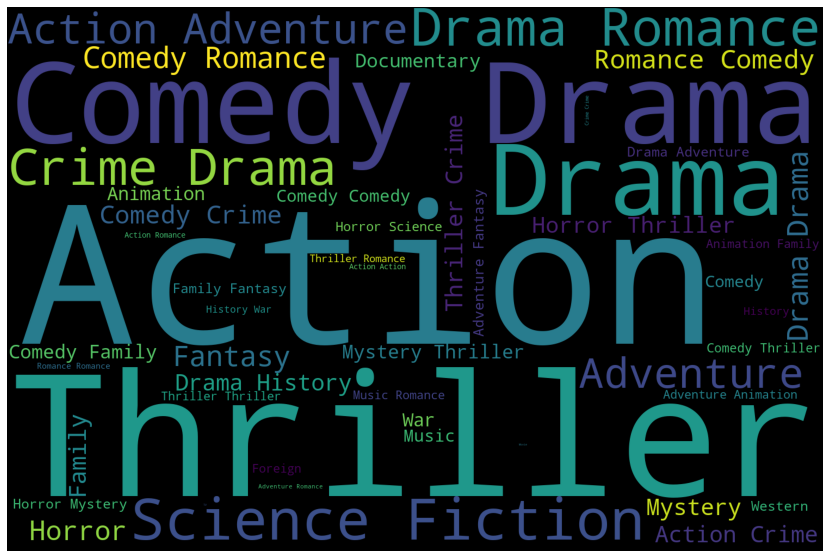

In [160]:
plt.figure(figsize = (15,10))
text = ' '.join([x for i in train['list_genres'] for x in i])
wc = WordCloud(width=1500, height=1000).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [149]:
count_type_genres = pd.Series([x for i in train['list_genres'] for x in i]).value_counts()

<AxesSubplot:>

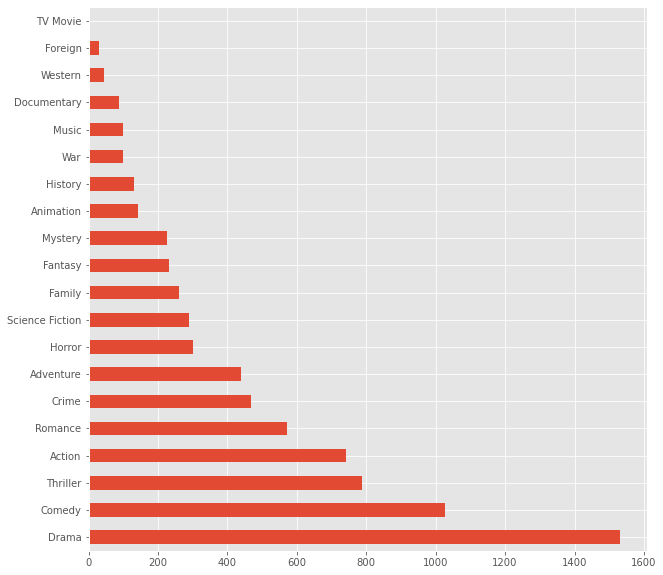

In [164]:
plt.figure(figsize=(10,10))
count_type_genres.plot(kind='barh')

In [162]:
train['count_genres'] = train['list_genres'].apply(lambda x: len(x))
train[['genres', 'list_genres','count_genres']].head(10)

,genres,list_genres,count_genres
0,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],1
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Family, Romance]",4
2,"[{'id': 18, 'name': 'Drama'}]",[Drama],1
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[Thriller, Drama]",2
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","[Action, Thriller]",2
5,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...","[Animation, Adventure, Family]",3
6,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[Horror, Thriller]",2
7,"[{'id': 99, 'name': 'Documentary'}]",[Documentary],1
8,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[Action, Comedy, Music, Family, Adventure]",5
9,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...","[Comedy, Music]",2


<AxesSubplot:xlabel='count_genres', ylabel='count'>

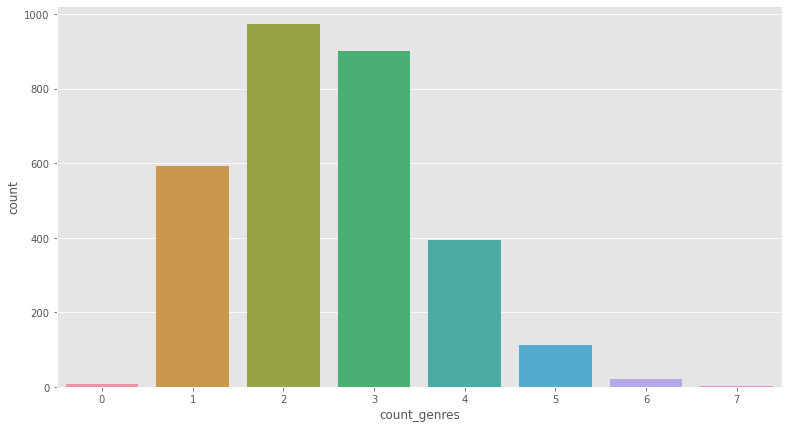

In [166]:
plt.figure(figsize=(13,7))
sns.countplot(x = 'count_genres', data = train)

### Budget

In [5]:
train, test = import_data()

In [7]:
train['budget'].head()

0    14000000
1    40000000
2     3300000
3     1200000
4           0
Name: budget, dtype: int64

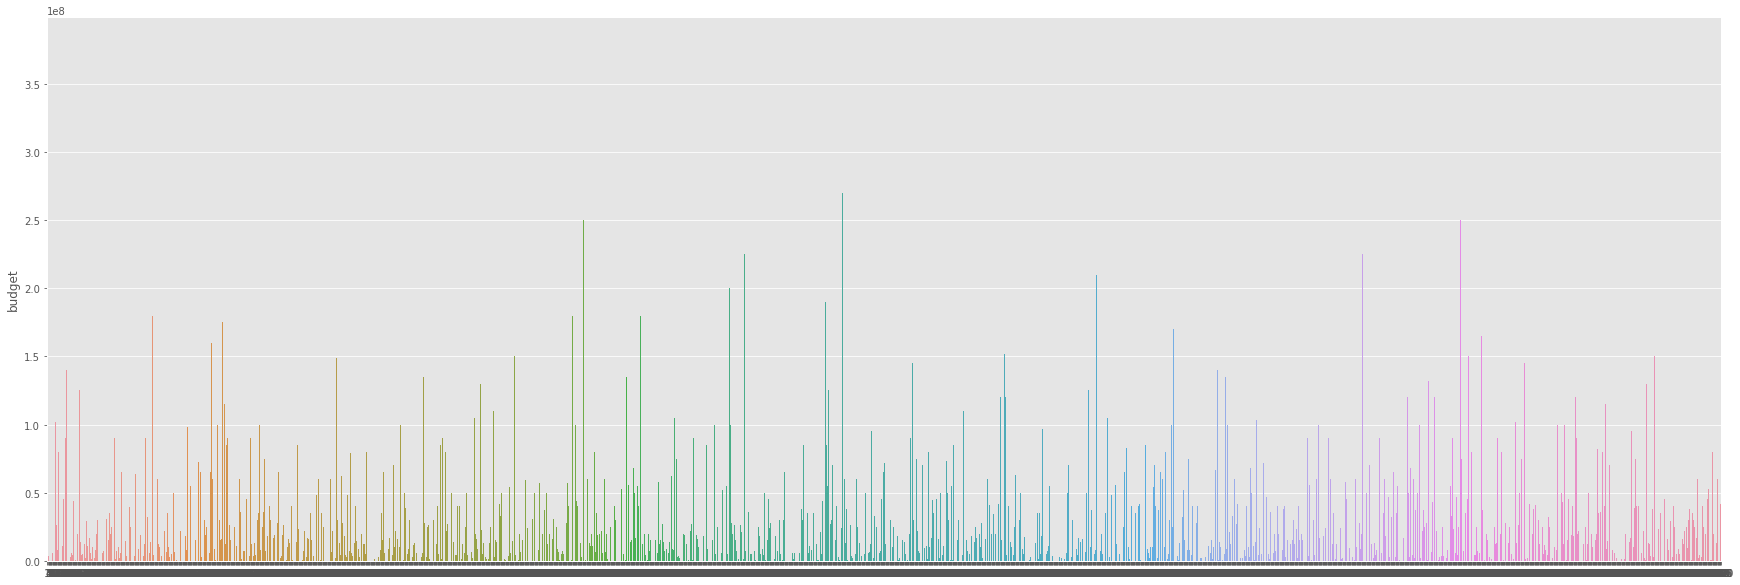

In [16]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x = 'id', y = 'budget', data = train)
ax.set(xlabel=None)
plt.show()

<AxesSubplot:xlabel='budget', ylabel='revenue'>

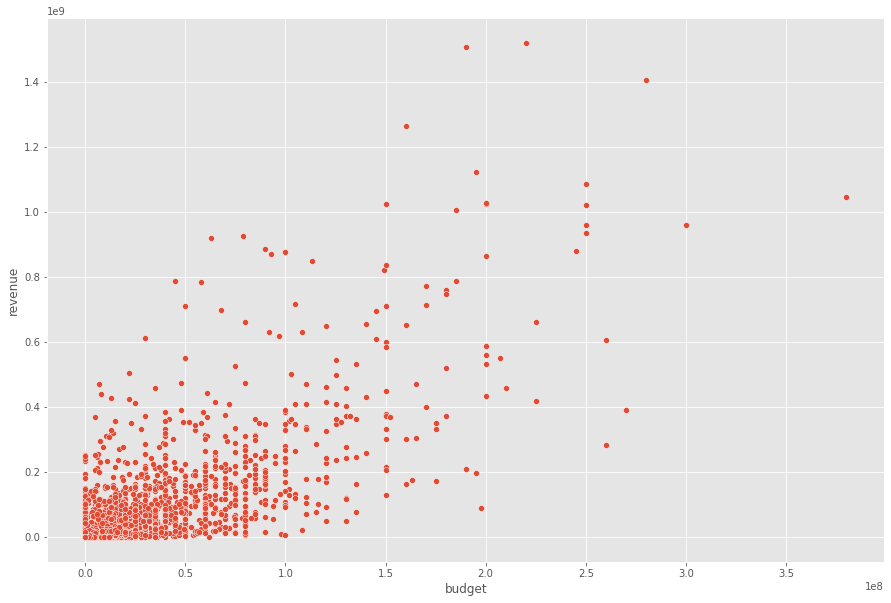

In [56]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'budget', y ='revenue', data = train)

In [17]:
train['budget'].describe()

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [37]:
corr_rev(train)

id            0.000610
budget        0.752965
homepage      0.263179
popularity    0.461460
runtime       0.216380
revenue       1.000000
Name: revenue, dtype: float64


### Homepage

In [39]:
train, test = import_data()

In [40]:
train['homepage'].head(10)

0                                   NaN
1                                   NaN
2     http://sonyclassics.com/whiplash/
3            http://kahaanithefilm.com/
4                                   NaN
5                                   NaN
6    http://www.thepossessionmovie.com/
7                                   NaN
8                                   NaN
9                                   NaN
Name: homepage, dtype: object

In [41]:
print("All:", len(train))
print("Null:", train['homepage'].isnull().sum())

All: 3000
Null: 2054


In [42]:
train['homepage'].fillna(0, axis = 0, inplace=True)
train['homepage'] = train['homepage'].apply(lambda x: 0 if x == 0 else 1)

In [43]:
corr_rev(train)

id            0.000610
budget        0.752965
homepage      0.263179
popularity    0.461460
runtime       0.216380
revenue       1.000000
Name: revenue, dtype: float64


### Overview

In [44]:
train, test = import_data()

In [45]:
train['overview'].head()

0    When Lou, who has become the "father of the In...
1    Mia Thermopolis is now a college graduate and ...
2    Under the direction of a ruthless instructor, ...
3    Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4    Marine Boy is the story of a former national s...
Name: overview, dtype: object

In [48]:
train['overview'].isnull().sum()

8

In [49]:
train['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [59]:
len(train['overview'][0])

155

In [64]:
train['overview'].fillna("", axis = 0, inplace = True)

In [68]:
train['len_overview'] = train['overview'].apply(len)

In [79]:
train[['overview', 'len_overview']].head()

,overview,len_overview
0,"When Lou, who has become the ""father of the In...",155
1,Mia Thermopolis is now a college graduate and ...,393
2,"Under the direction of a ruthless instructor, ...",130
3,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,581
4,Marine Boy is the story of a former national s...,168


<AxesSubplot:xlabel='len_overview', ylabel='revenue'>

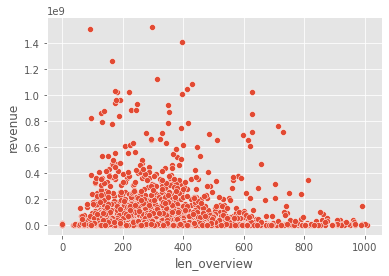

In [82]:
sns.scatterplot(x = 'len_overview', y = 'revenue', data = train)

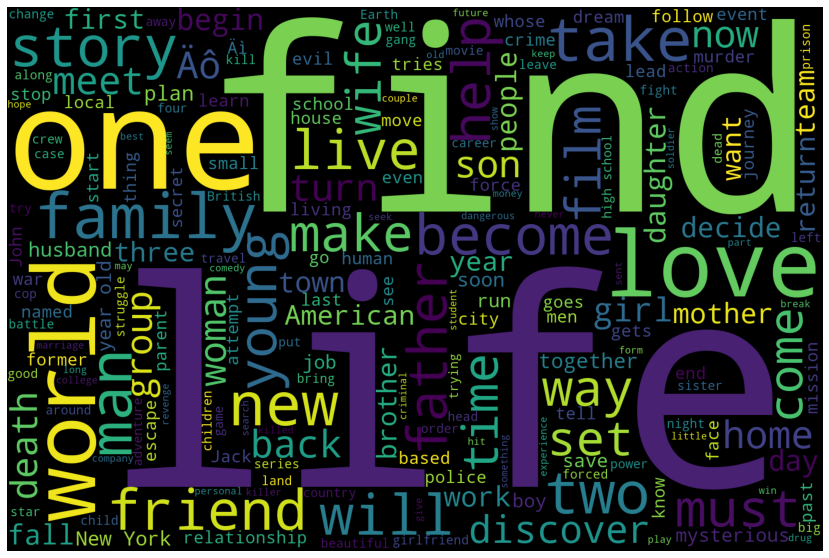

In [85]:
plt.figure(figsize = (15,10))
text = ''.join([x for i in train['overview'].fillna('') for x in i])
wc = WordCloud(width=1500, height=1000).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [89]:
print(wc.words_.keys())

dict_keys(['life', 'find', 'one', 'love', 'world', 'family', 'take', 'new', 'man', 'two', 'story', 'will', 'become', 'friend', 'father', 'live', 'young', 'help', 'must', 'make', 'way', 'time', 'film', 'set', 'come', 'wife', 'discover', 'meet', 'back', 'home', 'now', 'turn', 'son', 'woman', 'Äô', 'group', 'death', 'girl', 'begin', 'daughter', 'town', 'day', 'fall', 'team', 'decide', 'mother', 'work', 'people', 'American', 'first', 'three', 'year', 'want', 'brother', 'return', 'together', 'plan', 'New York', 'husband', 'soon', 'mysterious', 'job', 'save', 'run', 'year old', 'boy', 'relationship', 'past', 'start', 'lead', 'murder', 'face', 'city', 'goes', 'dream', 'secret', 'named', 'thing', 'tries', 'school', 'former', 'war', 'tell', 'gets', 'know', 'follow', 'end', 'Jack', 'Äì', 'whose', 'attempt', 'go', 'local', 'journey', 'stop', 'human', 'evil', 'John', 'living', 'mission', 'police', 'escape', 'force', 'even', 'crime', 'based', 'learn', 'see', 'men', 'last', 'house', 'move', 'small',

### Popularity

### Posterpath

In [93]:
train['poster_path'].head(10)

0    /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1    /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2    /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3    /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4    /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
5    /6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg
6    /4QjzFuaZmB4btGnLwAgdp23BzIU.jpg
7    /83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg
8    /5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg
9    /xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg
Name: poster_path, dtype: object

In [94]:
train['poster_path'].isnull().sum()

1

### Production companies

In [203]:
train, test = import_data()

In [204]:
train['production_companies'].head(10)

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                  NaN
4                                                  NaN
5                                                  NaN
6    [{'name': 'Ghost House Pictures', 'id': 768}, ...
7                                                  NaN
8    [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
9    [{'name': 'Castle Rock Entertainment', 'id': 97}]
Name: production_companies, dtype: object

In [205]:
extract_from_str(train, 'production_companies')

In [206]:
train['production_companies'].head(10)

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                    0
4                                                    0
5                                                    0
6    [{'name': 'Ghost House Pictures', 'id': 768}, ...
7                                                    0
8    [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
9    [{'name': 'Castle Rock Entertainment', 'id': 97}]
Name: production_companies, dtype: object

In [207]:
train['list_production_companies'] = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
train[['production_companies', 'list_production_companies']].head(10)

,production_companies,list_production_companies
0,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[Paramount Pictures, United Artists, Metro-Gol..."
1,"[{'name': 'Walt Disney Pictures', 'id': 2}]",[Walt Disney Pictures]
2,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[Bold Films, Blumhouse Productions, Right of W..."
3,0,[]
4,0,[]
5,0,[]
6,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[Ghost House Pictures, North Box Productions]"
7,0,[]
8,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[Walt Disney Pictures, Jim Henson Productions,..."
9,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",[Castle Rock Entertainment]


In [209]:
train['main_production_companies'] = train['list_production_companies'].apply(lambda x: x[0] if x != [] else 'no_info')

In [210]:
train['main_production_companies'].value_counts().head(10)

Universal Pictures                        167
Paramount Pictures                        158
no_info                                   156
Twentieth Century Fox Film Corporation    122
Columbia Pictures                          90
Warner Bros.                               70
New Line Cinema                            69
Walt Disney Pictures                       62
TriStar Pictures                           44
Columbia Pictures Corporation              44
Name: main_production_companies, dtype: int64

In [211]:
train['len_production_companies'] = train['list_production_companies'].apply(len)

In [212]:
train['list_production_companies'] = list(train['production_companies'].apply(lambda x: [i['id'] for i in x] if x != 0 else []).values)
train['main_production_companies_id'] = train['list_production_companies'].apply(lambda x: x[0] if x != [] else 0)

In [214]:
train['main_production_companies_id'].value_counts()

33       167
4        158
0        156
306      122
5         90
        ... 
137        1
7372       1
1531       1
14121      1
216        1
Name: main_production_companies_id, Length: 1065, dtype: int64

In [220]:
train.drop(['list_production_companies', 'main_production_companies'], axis = 1, inplace = True)

In [221]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'len_production_companies', 'main_production_companies_id'],
      dtype='object')

### Production countries

In [279]:
train, test = import_data()

In [280]:
train['production_countries'][0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [281]:
extract_from_str(train, 'production_countries')

In [282]:
train['list_production_countries'] = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
train[['production_countries', 'list_production_countries']].head(10)

,production_countries,list_production_countries
0,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America]
1,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America]
2,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America]
3,"[{'iso_3166_1': 'IN', 'name': 'India'}]",[India]
4,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",[South Korea]
5,0,[]
6,"[{'iso_3166_1': 'US', 'name': 'United States o...","[United States of America, Canada]"
7,0,[]
8,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America]
9,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America]


In [283]:
train['list_production_countries'].apply(len).sort_values(ascending=False).head(10)

71      8
1331    6
1338    6
2314    6
777     5
1127    5
2244    5
1775    5
710     5
2237    5
Name: list_production_countries, dtype: int64

In [284]:
train['len_production_countries'] = train['list_production_countries'].apply(len)

/home/adamz/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Len production countries vs revenue')

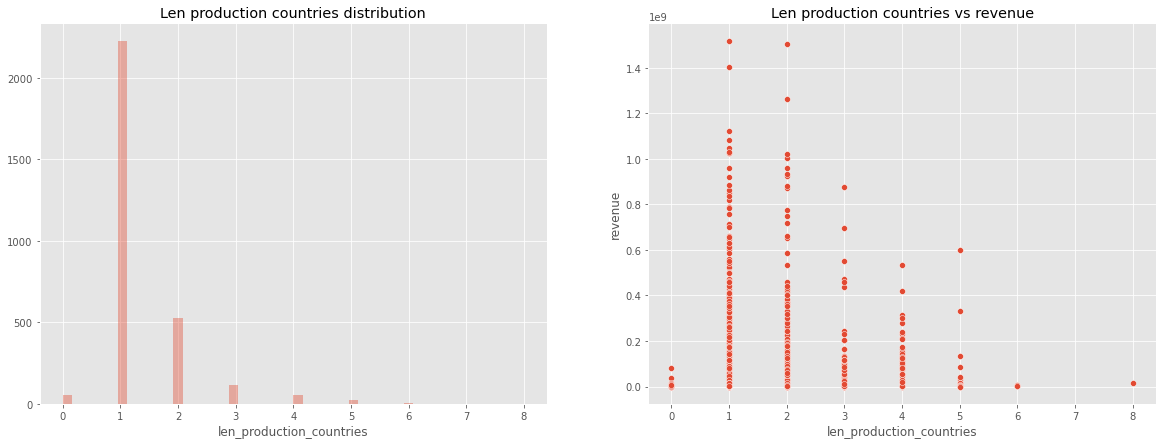

In [285]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
f1 = sns.distplot(train['len_production_countries'], kde = False)
f1.set_title('Len production countries distribution')
plt.subplot(1, 2, 2)
f2 = sns.scatterplot(x = 'len_production_countries', y = 'revenue', data = train)
f2.set_title('Len production countries vs revenue')

In [286]:
train['list_production_countries']

0       [United States of America]
1       [United States of America]
2       [United States of America]
3                          [India]
4                    [South Korea]
                   ...            
2995    [United States of America]
2996             [Denmark, Sweden]
2997    [United States of America]
2998    [United States of America]
2999    [United States of America]
Name: list_production_countries, Length: 3000, dtype: object

In [287]:
count_production_countries = pd.Series([x for i in train['list_production_countries'] for x in i]).value_counts()

<AxesSubplot:>

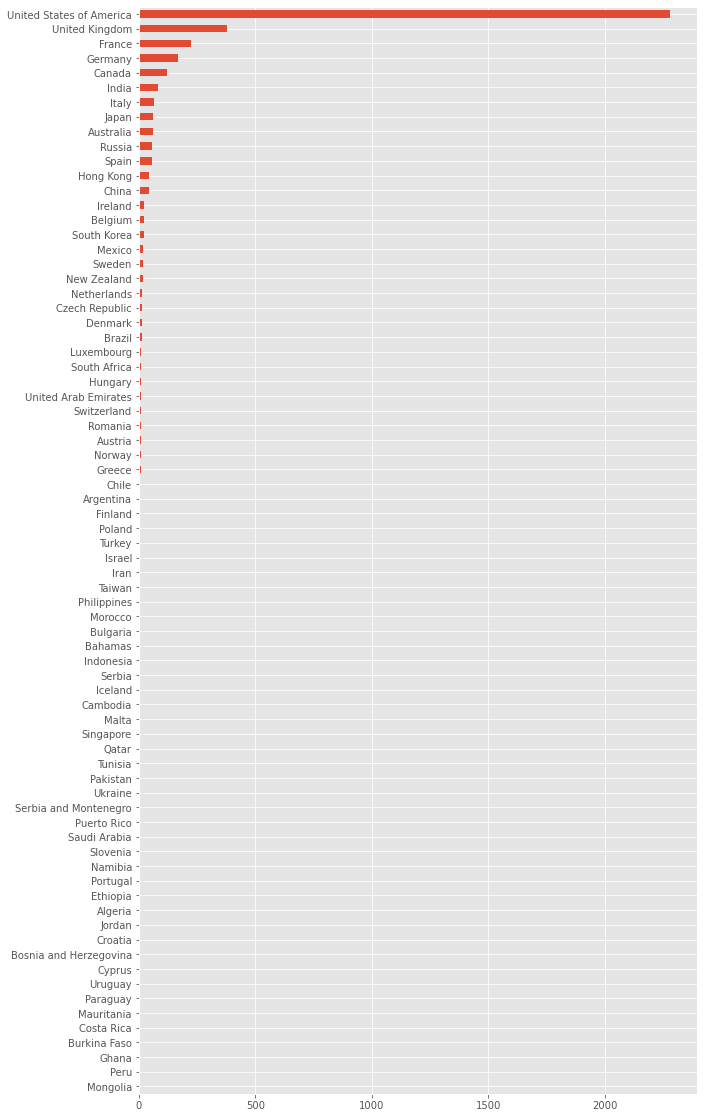

In [288]:
plt.figure(figsize=(10,20))
count_production_countries.sort_values(ascending=True).plot(kind = 'barh')

In [294]:
train['if_in_USA'] = train['list_production_countries'].apply(lambda x: 1 if 'United States of America' in x else 0)

/home/adamz/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'If production in USA vs revenue')

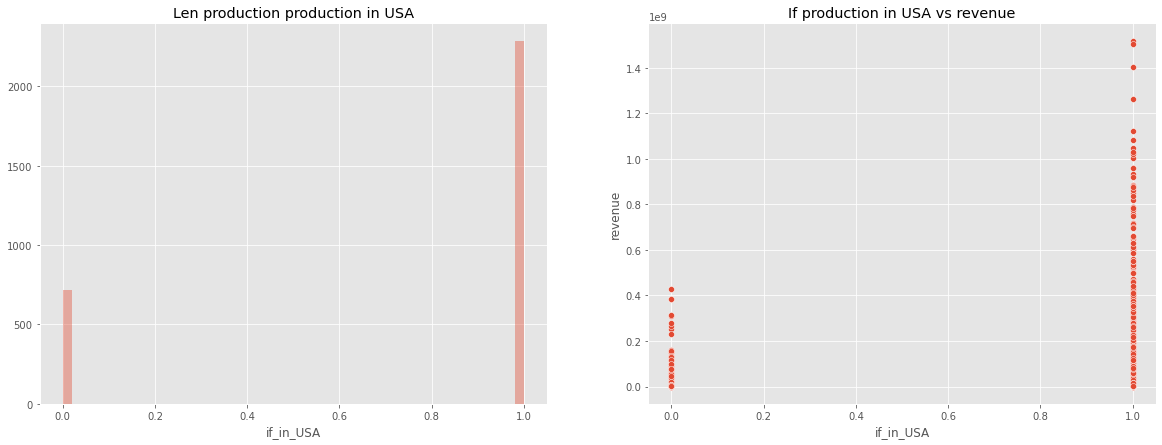

In [299]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
f1 = sns.distplot(train['if_in_USA'], kde = False)
f1.set_title('Len production production in USA')
plt.subplot(1, 2, 2)
f2 = sns.scatterplot(x = 'if_in_USA', y = 'revenue', data = train)
f2.set_title('If production in USA vs revenue')


In [305]:
train.drop(['list_production_countries'], axis = 1, inplace = True)

### Relase date

In [ ]:
train, test = import_data()

### Runtime

In [ ]:
train, test = import_data()

### Spoken language

In [ ]:
train, test = import_data()

### Status

In [ ]:
train, test = import_data()

### Tagline

In [ ]:
train, test = import_data()

### Title

In [ ]:
train, test = import_data()

### Keywords

In [ ]:
train, test = import_data()

### Cast

In [ ]:
train, test = import_data()

### Crew

In [ ]:
train, test = import_data()

### Koniec

In [154]:
# :)